<a href="https://colab.research.google.com/github/binit24/Datascience.com/blob/main/Copy_of_Absenteeism_Dataset_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
f = open("Absenteeism_at_work.xls")

In [4]:
#Reading the Dataset:
df = pd.read_excel('Absenteeism_at_work.xls')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [5]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
#Checking the info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [7]:
#All features are in neumerical features thats great! but we know that Reason for absence is categorical lets figure that out:

In [8]:
#Drop 'ID':
df.drop(['ID'], axis =1,inplace=True)

In [9]:
#cheking Duplicate columns:
df.duplicated().sum()

34

                                 Total Missing Value
Reason for absence                                 0
Month of absence                                   0
Day of the week                                    0
Seasons                                            0
Transportation expense                             0
Distance from Residence to Work                    0
Service time                                       0
Age                                                0
Work load Average/day                              0
Hit target                                         0
Disciplinary failure                               0
Education                                          0
Son                                                0
Social drinker                                     0
Social smoker                                      0
Pet                                                0
Weight                                             0
Height                                        

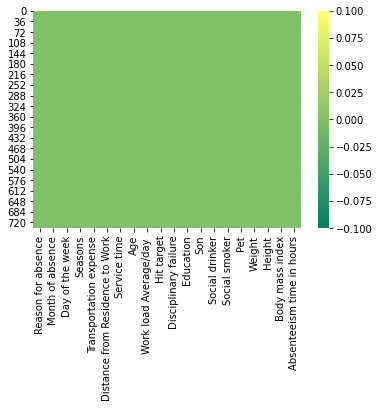

In [10]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [11]:
#Wow no missing values,its an well balanced dataset thats great!

In [12]:
#'Reason for Absence' Column lets work out in it.
#'Unknown'.
#'Certain infectious and parasitic diseases'.
#'Neoplasms'.
#'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism'.
#'Endocrine, nutritional and metabolic diseases'.
#'Mental and behavioural disorders'.
#'Diseases of the nervous system'.
#'Diseases of the eye and adnexa'.
#'Diseases of the ear and mastoid process'.
#'Diseases of the circulatory system'.
#'Diseases of the respiratory system'.
#'Diseases of the digestive system'.
#'Diseases of the skin and subcutaneous tissue'.
#'Diseases of the musculoskeletal system and connective tissue'.
#'Diseases of the genitourinary system'.
#'Pregnancy, childbirth and the puerperium'.
#'Certain conditions originating in the perinatal period'.
#'Congenital malformations, deformations and chromosomal abnormalities'.
#'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified'.
#'Injury, poisoning and certain other consequences of external causes'.
#'External causes of morbidity and mortality'.
#'Factors influencing health status and contact with health services'.
#'Patient follow-up'.
#'Medical consultation'.
#'Blood donation'.
#'Laboratory examination'.
#'Unjustified absence'.
#'Physiotherapy'.
#'Dental consultation.

In [13]:
df['Reason for absence'].min()

0

In [14]:
df['Reason for absence'].max()

28

In [15]:
#Ok there are 28 reason for absence which all are mentioned above so lets rearrange all this data together:
#For this we need to convert the reason for absence in dummy column:
#After that we can create different categories of that.

In [16]:
#Checking the unique value:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [17]:
len(df['Reason for absence'].unique())

28

In [18]:
#we can see that one data is absent lets chek which one:
sorted(df['Reason for absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [19]:
#Lets use get dummies method:
reason_columns = pd.get_dummies(df['Reason for absence'])
print(reason_columns.head())

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   19  21  22  23  24  25  26  27  28  
0   0   0   0   0   0   0   1   0   0  
1   0   0   0   0   0   0   0   0   0  
2   0   0   0   1   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0  
4   0   0   0   1   0   0   0   0   0  


In [20]:
#We are summing up and saving the data in check column to check whether theres any null values or not:
reason_columns['check'] = reason_columns.sum(axis=1)

In [21]:
reason_columns['check'].sum(axis=0)

740

In [22]:
reason_columns['check'].unique()

array([1])

In [23]:
#We dont need 0 reason of absence so we are going to drop it
reason_columns = pd.get_dummies(df['Reason for absence'], drop_first = True)

In [24]:
#Lets drop the Reson for absence columns:
df = df.drop(['Reason for absence'], axis = 1)

In [25]:
#Checking the Columns:
column = list(df.columns)
print(column)

['Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [26]:
#Summing of the dummies values into four categories:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [27]:
#Using the concat Method to to combine the reason column and dataset:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)

In [28]:
df.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,0,1,2,3
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


In [29]:
columns = list(df.columns)
print(columns)
print(df.shape)

['Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours', 0, 1, 2, 3]
(740, 23)


In [30]:
#Rearranging the Columns:
column_names = ['Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [31]:
df.columns = column_names

In [32]:
df.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason_1,Reason_2,Reason_3,Reason_4
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


In [33]:
#Reordering Columns:
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

In [34]:
df = df[column_names_reordered]

In [35]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [36]:
#checking the value count of some features:
print(df['Education'].value_counts())

1    611
3     79
2     46
4      4
Name: Education, dtype: int64


In [37]:
df['Education'] = df['Education'].map({1:0,3:1,2:1,4:1})

In [38]:
df['Education'].value_counts()

0    611
1    129
Name: Education, dtype: int64

In [39]:
#Checking value count for target variable:
df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

In [40]:
#lLets work on Target Variable:
df['Absenteeism time in hours'].median()

3.0

In [41]:
#Lets consider 3 as threhold value all values below 3 is 0 and above 3 is 1:
output = np.where(df['Absenteeism time in hours']>df['Absenteeism time in hours'].median(), 1,0)

In [42]:
df['Absenteesim'] = output
df.drop('Absenteeism time in hours',axis=1,inplace=True)

In [43]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteesim
0,0,0,0,1,7,3,1,289,36,13,33,239554,97,0,0,2,1,0,1,90,172,30,1
1,0,0,0,0,7,3,1,118,13,18,50,239554,97,1,0,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239554,97,0,0,0,1,0,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,39,239554,97,0,0,2,1,1,0,68,168,24,1
4,0,0,0,1,7,5,1,289,36,13,33,239554,97,0,0,2,1,0,1,90,172,30,0


In [44]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteesim
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.255405,0.008108,0.090541,0.587838,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,0.174324,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,0.458108
std,0.436384,0.089740,0.287149,0.492557,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.379645,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,0.498579
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,1.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,1.000000


In [ ]:
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

In [ ]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

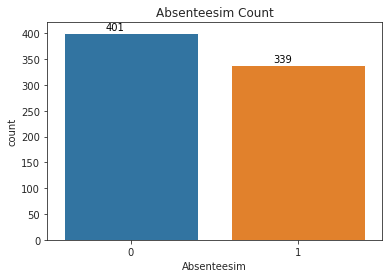

In [ ]:
#Univariate Analysis:
#Checking the count of target variable:
sns.set_style('ticks')
ax = sns.countplot(df['Absenteesim'])
plt.title("Absenteesim Count")
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

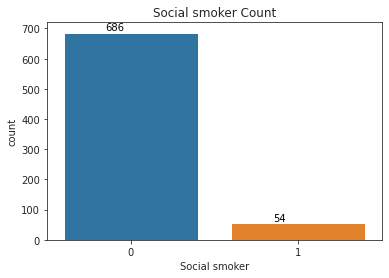

In [ ]:
#Univariate Analysis:
#Checking the count of Social smoker:
sns.set_style('ticks')
ax = sns.countplot(df['Social smoker'])
plt.title("Social smoker Count")
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

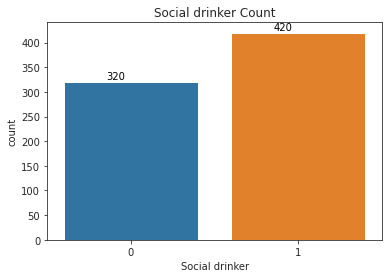

In [ ]:
#Univariate Analysis:
#Checking the count of Social drinker:
sns.set_style('ticks')
ax = sns.countplot(df['Social drinker'])
plt.title("Social drinker Count")
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

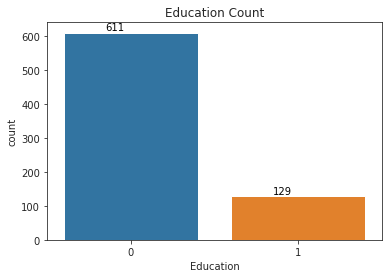

In [ ]:
#Univariate Analysis:
#Checking the count of Education:
sns.set_style('ticks')
ax = sns.countplot(df['Education'])
plt.title("Education Count")
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

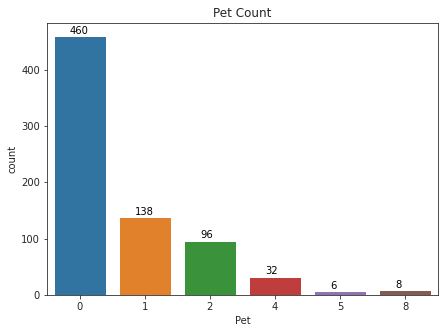

In [ ]:
#Univariate Analysis:
#Checking the count of Education:
sns.set_style('ticks')
plt.figure(figsize=(7,5))
ax = sns.countplot(df['Pet'])
plt.title("Pet Count")
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

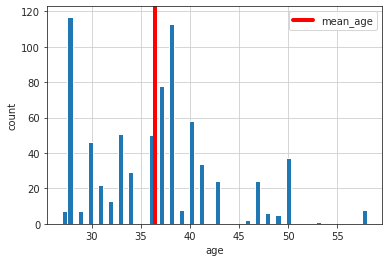

In [ ]:
#Univariate Analysis:
#Checking the mean of Age and the distribution:
age = df['Age'].hist(bins=60)
means_val = np.mean(df['Age'])
plt.axvline(means_val,linewidth=4,color='red',label='mean_age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

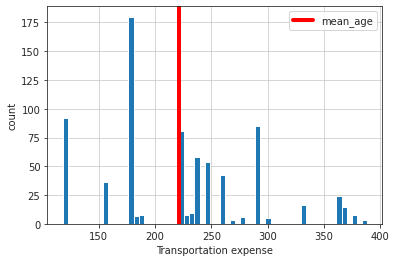

In [ ]:
#Univariate Analysis:
#Checking the mean of Transportation expense and the distribution:
age = df['Transportation expense'].hist(bins=60)
means_val = np.mean(df['Transportation expense'])
plt.axvline(means_val,linewidth=4,color='red',label='mean_age')
plt.xlabel('Transportation expense')
plt.ylabel('count')
plt.legend()
plt.show()

Age  Absenteesim
27   0               4
     1               3
28   0              70
     1              47
29   0               5
Name: Absenteesim, dtype: int64

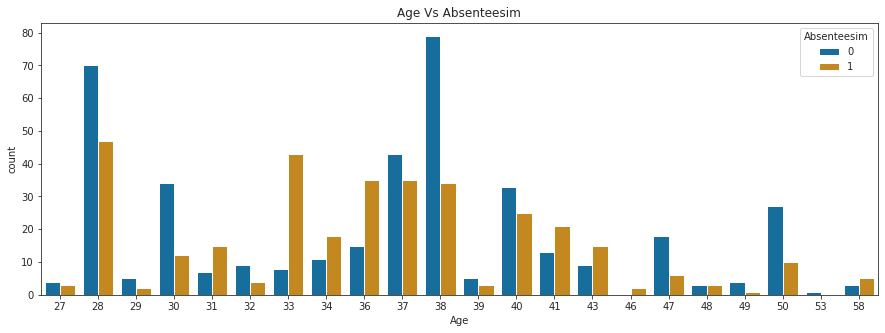

In [ ]:
#Bivariate Analysis:
#Checking the realationship between Absenteesim and Age:
plt.subplots(figsize=(15,5))
plt.title('Age Vs Absenteesim')
sns.countplot(x='Age',hue='Absenteesim',data=df,palette='colorblind')
df.groupby('Age')['Absenteesim'].value_counts().head()

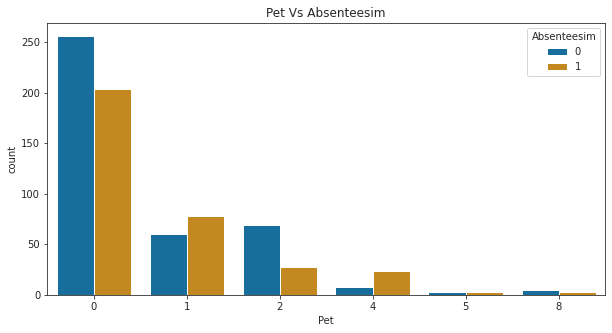

In [ ]:
#Bivariate Analysis:
#Checking the realationship between Absenteesim and Pet:
plt.subplots(figsize=(10,5))
plt.title('Pet Vs Absenteesim')
sns.countplot(x='Pet',hue='Absenteesim',data=df,palette='colorblind')

Body mass index  Absenteesim
19               0              34
                 1              12
21               0              11
                 1              11
22               0              19
Name: Absenteesim, dtype: int64

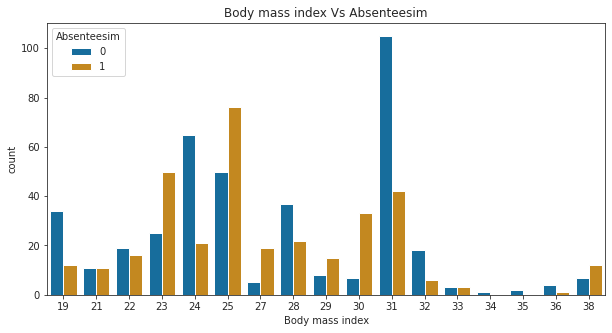

In [ ]:
#Bivariate Analysis:
#Checking the realationship between Absenteesim and Body mass index:
plt.subplots(figsize=(10,5))
plt.title('Body mass index Vs Absenteesim')
sns.countplot(x='Body mass index',hue='Absenteesim',data=df,palette='colorblind')
df.groupby('Body mass index')['Absenteesim'].value_counts().head()

Education  Absenteesim
0          0              330
           1              281
1          0               71
           1               58
Name: Absenteesim, dtype: int64

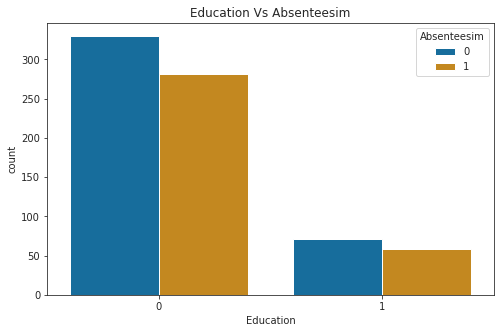

In [ ]:
#Bivariate Analysis:
#Checking the realationship between Absenteesim and Education:
plt.subplots(figsize=(8,5))
plt.title('Education Vs Absenteesim')
sns.countplot(x='Education',hue='Absenteesim',data=df,palette='colorblind')
df.groupby('Education')['Absenteesim'].value_counts().head()

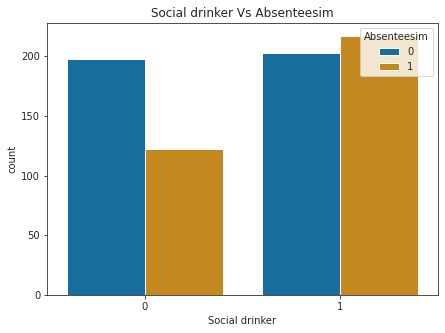

In [ ]:
#Bivariate Analysis:
#Checking the realationship between Absenteesim and Social drinker:
plt.subplots(figsize=(7,5))
plt.title('Social drinker Vs Absenteesim')
sns.countplot(x='Social drinker',hue='Absenteesim',data=df,palette='colorblind')

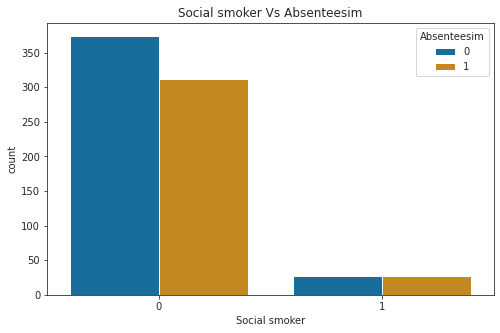

In [ ]:
#Bivariate Analysis:
#Checking the realationship between Absenteesim and Social smoker:
plt.subplots(figsize=(8,5))
plt.title('Social smoker Vs Absenteesim')
sns.countplot(x='Social smoker',hue='Absenteesim',data=df,palette='colorblind')

Text(8.841970486111116, 0.5, 'Age')

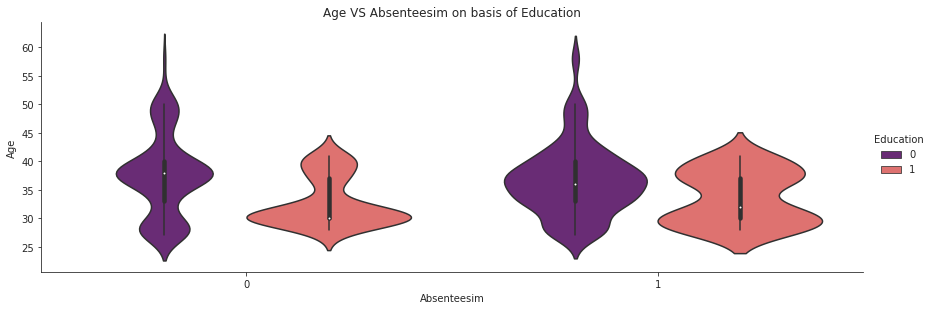

In [ ]:
#Multivariate Analysis
sns.factorplot(x='Absenteesim',y='Age',hue='Education',data=df,kind="violin",size=4,palette="magma",aspect=3)
plt.title("Age VS Absenteesim on basis of Education")
plt.xlabel('Absenteesim')
plt.ylabel('Age')

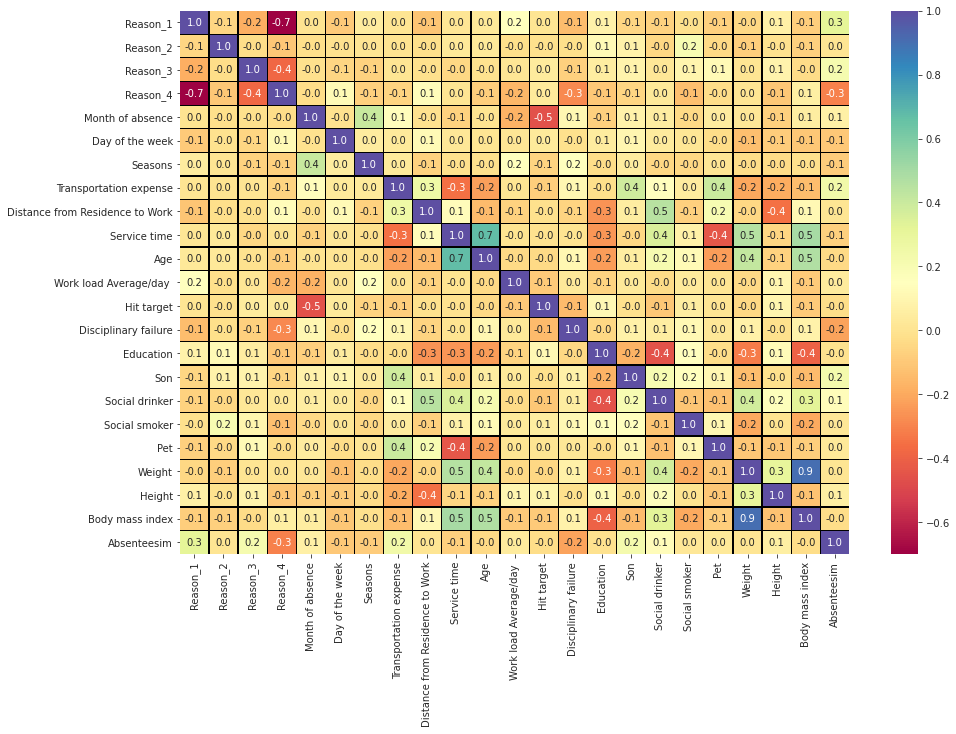

In [ ]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

Text(0.5, 1.0, 'corelation with target variable')

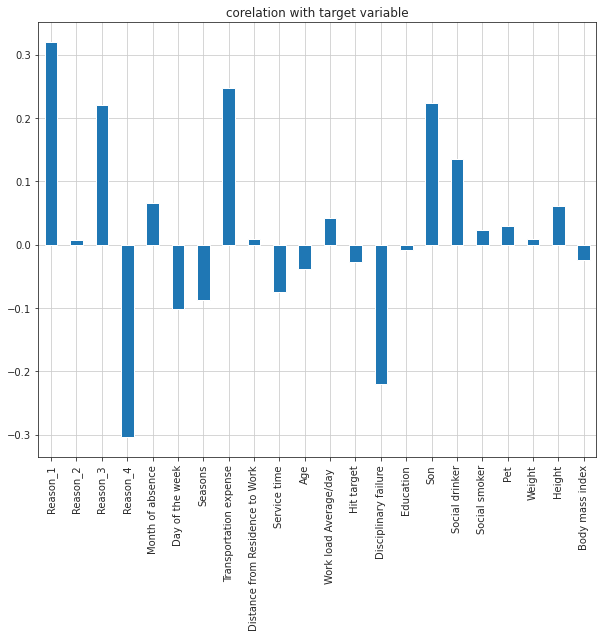

In [ ]:
#corelation with target column:
plt.figure(figsize=(10,8))
df.drop('Absenteesim',axis=1).corrwith(df['Absenteesim']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [45]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (740, 23)
After removal of outliers: (542, 23)


In [46]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.
df_final.skew()

Reason_1                           0.970054
Reason_2                           0.000000
Reason_3                           0.000000
Reason_4                          -0.949885
Month of absence                   0.101825
Day of the week                    0.056784
Seasons                           -0.042350
Transportation expense             0.373132
Distance from Residence to Work    0.224680
Service time                      -0.144186
Age                                0.496737
Work load Average/day              1.044067
Hit target                        -0.486158
Disciplinary failure               0.000000
Education                          1.817866
Son                                1.469291
Social drinker                    -0.185807
Social smoker                      0.000000
Pet                                1.697092
Weight                            -0.118390
Height                             1.479018
Body mass index                    0.039616
Absenteesim                     

In [47]:
import scipy.stats as stat
import pylab

In [48]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

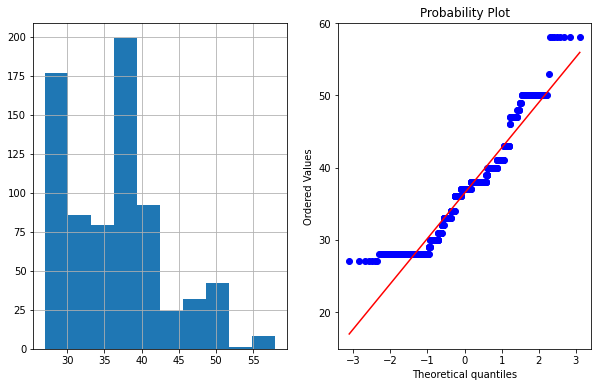

In [49]:
#We can check for skewness by using Distrution plot:
plot_data(df,'Age')

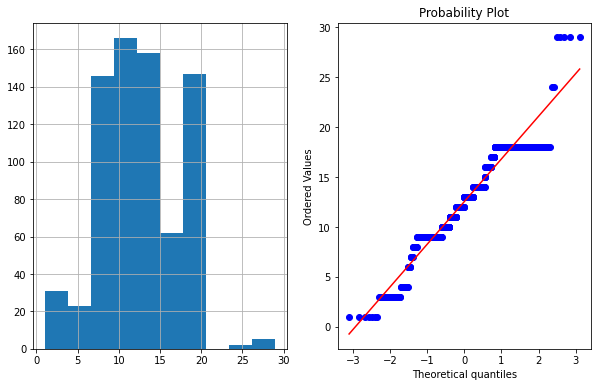

In [50]:
#We can check for skewness by using Distrution plot:
plot_data(df,'Service time')

In [51]:
#Dropping unwanted column:
df.drop(columns=['Disciplinary failure','Service time'],axis=1,inplace=True)

In [52]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('Absenteesim',axis=1)
y = df_final['Absenteesim']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (542, 22)
shape of y is (542,)


In [53]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [56]:
model = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    print("Score of",m, "is:",m.score(X_train,y_train))
    y_predict= m.predict(X_test)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    score = cross_val_score(m,X,y,cv=5,scoring='accuracy').mean()
    print("Cross validation is",np.mean(score)*100)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.6651270207852193
accuracy_score: 0.6788990825688074
Cross validation is 73.7920489296636
[[45 17]
 [18 29]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        62
           1       0.63      0.62      0.62        47

    accuracy                           0.68       109
   macro avg       0.67      0.67      0.67       109
weighted avg       0.68      0.68      0.68       109

[[45 17]
 [18 29]]
******************************************************************


Score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='

In [57]:
#It looks like the Random Forest Regression has a good F1 score on the test set, but keep in mind this is just a single training/test split; we need to confirm this performance holds for other splits. In addition, we need to tune the regularization hyperparameter. 
#Fortunately, there's a way to tackle both at the same time without introducing additional bias

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import StratifiedShuffleSplit

In [60]:
# Create Hyperparametre tuning
param_grid = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
              'criterion':['gini','entropy'],
              'bootstrap':[True,False],
              'min_samples_leaf':randint(1,4)}

In [61]:
random_grid = RandomizedSearchCV(classifier,param_distributions= param_grid,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),scoring='f1',n_jobs=-1)
random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples...
                                        'criterion': ['gini',

In [62]:
#Fetching best parametre:
random_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 400}

accuracy_score: 0.7889908256880734
[[51 11]
 [12 35]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        62
           1       0.76      0.74      0.75        47

    accuracy                           0.79       109
   macro avg       0.79      0.78      0.78       109
weighted avg       0.79      0.79      0.79       109



Text(0.5, 15.0, 'Predicted label')

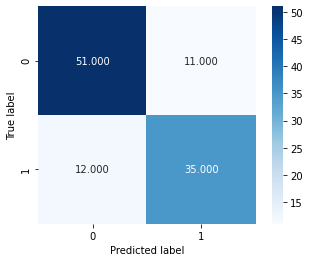

In [63]:
classifier = RandomForestClassifier(bootstrap=False,criterion='gini',max_features=2,min_samples_leaf=2,n_estimators=400)
classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,X,y,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),scoring='f1',n_jobs=-1)

In [65]:
scores.mean()

0.7158317337379122

In [67]:
#Its our final model score performance:

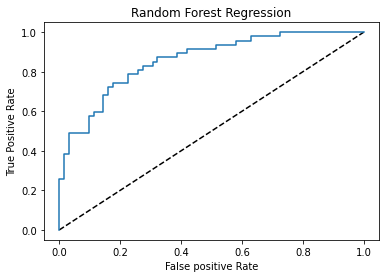

0.78363074811256


In [68]:
#AUC and ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = classifier.predict_proba(X_test)[:,1]
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='Random Forest Regression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Regression')
plt.show()

auc_score = roc_auc_score(y_test,y_predict)
print(auc_score)

In [69]:
#Saving the best Model:
import joblib
joblib.dump(classifier,'classifier.obj')
classifier_from_joblib = joblib.load('classifier.obj')
classifier_from_joblib.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])